## Experiments with the toy graph

In [1]:
import os
# set the directory to the root of the repo
os.chdir("/Users/jeandurand/Documents/Masters Thesis/msc-thesis")

In [2]:
from utils.graph_utils.toy_graph import ToyGraph

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph


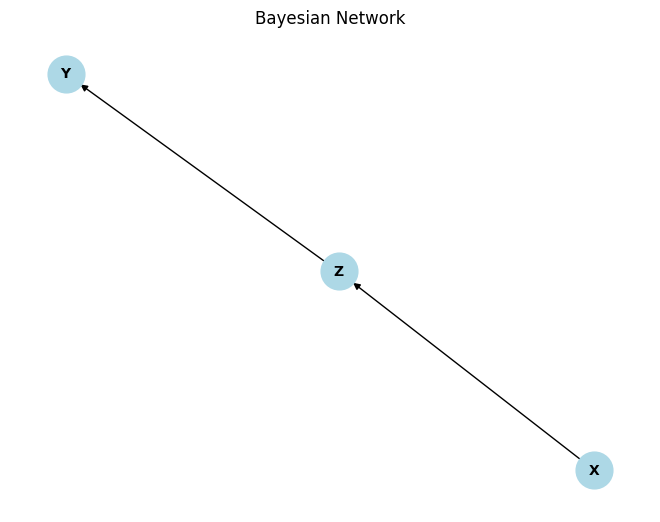

In [3]:
toy_graph = ToyGraph()
toy_graph.show_graphical_model()

# Trying to understand how the toy graph works

INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Fitting the Gaussian Processes based on the new data
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


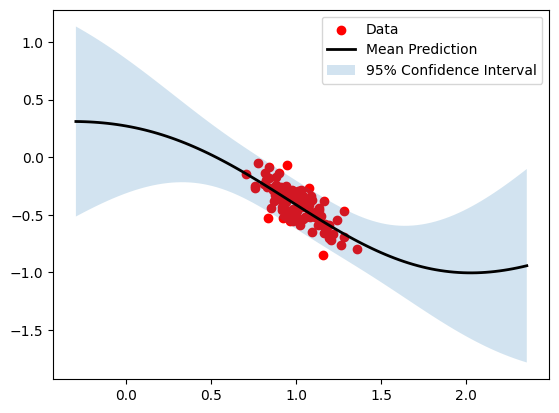

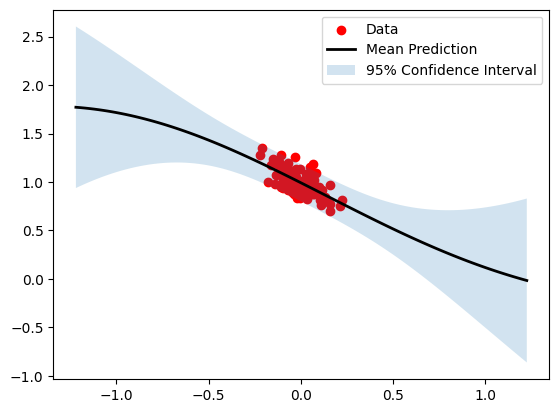

In [4]:
from utils.graph_utils.toy_graph import ToyGraph
from utils.sem_sampling import sample_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
# importlib.reload(ToyGraph)

graph = ToyGraph()
sample = sample_model(graph.SEM(), seed=42)
functions = graph.refit_models(sample)

Z = sample['Z'].reshape(-1)
X_new = np.linspace(Z.min() - 1, Z.max() + 1, 100)[:, np.newaxis]
# Predicting the mean and variance for new data points
mean, variance = functions['Y'].predict(X_new)
# Plot original data
plt.scatter(sample['Z'].reshape(-1), sample['Y'].reshape(-1), c='r', label='Data')
# Plot GP mean
plt.plot(X_new, mean, 'k', lw=2, zorder=9, label='Mean Prediction')
# Plot confidence interval
plt.fill_between(X_new[:, 0], mean[:, 0] - 1.96*np.sqrt(variance[:, 0]),
                    mean[:, 0] + 1.96*np.sqrt(variance[:, 0]), alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.show()


X = sample['X'].reshape(-1)
X_new = np.linspace(X.min()-1, X.max()+1, 100)[:, np.newaxis]
# Predicting the mean and variance for new data points
mean, variance = functions['Z'].predict(X_new)
# Plot original data
plt.scatter(sample['X'].reshape(-1), sample['Z'].reshape(-1), c='r', label='Data')
# Plot GP mean
plt.plot(X_new, mean, 'k', lw=2, zorder=9, label='Mean Prediction')
# Plot confidence interval
plt.fill_between(X_new[:, 0], mean[:, 0] - 1.96*np.sqrt(variance[:, 0]),
                    mean[:, 0] + 1.96*np.sqrt(variance[:, 0]), alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.show()


In [5]:
do_functions = graph.get_all_do()
do_functions['compute_do_XZ'](sample, functions, [3, -2])

INFO:root:Getting the do-functions for the ToyGraph


(0.04181988108683212, 0.5581221282779455)

# Drawing interventional samples

In [6]:
from CBO_algorithm import CBO_algorithm
CBO_algorithm()

INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Getting the variables (mis and pomis) for the CBO algorithm
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph


INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Getting the inverventional range for t

KeyboardInterrupt: 